<a href="https://colab.research.google.com/github/lamortizme/Unix-Workbench/blob/master/proyectoIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from numpy.fft import fft2, fftshift, ifft2 

#%%

def cmask(a,b,radius,N):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask = (t)**2 + (s)**2 <= radius*radius
  array = np.zeros((N,N))
  array[mask] = 1.

  return array

def icmask(a,b,radius,N):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask = (t)**2 + (s)**2 <= radius*radius
  array = np.ones((N,N))
  array[mask] = 0.

  return array


def smask(N,T):
  mask=np.zeros((N,N))
  for i in range(-1*int(N/2),int(N/2)):
    for j in range(-1*int(N/2),int(N/2)):
       mask[i,j] = ((1/2)*(1+1*np.cos(((2*np.pi*j)/T))))
  return mask

def rmask(a,b,N,c,d):
  t, s = np.ogrid[-a:N-a,-b:N-b]
  mask1 = (t+0*s)<= c
  mask2 = (t+ 0*s)>=-c
  mask3 = (0*t+s)<= d
  mask4 = (0*t+ s)>=-d
  mask=mask1*mask2*mask3*mask4
  array = np.zeros((N,N))
  array[mask] = 1.

  return array
#%%

wl= 633e-6
L=200 #medida en micrometros del objeto
N= 640 #numero de particiones del objeto
dx= L/N #tamaño de particiones del objeto
df= 1/L #tamaño de particiones de la transformada de Fourier 
Lf= df*N #tamaño de la imagen en el plano de Fourier 
nf=5

print('Lf: ',Lf)
print('L: ',L)
print('dx: ',dx)
print('df: ',df)


radio = 1
radio_externo=26

#z=(radio**2)/(wl*nf)

#ut= rmask(int(N/2),int(N/2),N,10,10)

#ut=cmask(int(N/2),int(N/2),radio_externo/dx,N)*icmask(int(N/2),int(N/2),radio/dx,N)
ut= cmask(int(N/2),int(N/2),radio/df,N)#*np.exp(1j*0)
utt=cmask(int(N/2),int(N/2),radio_externo*Lf,N)
hh= np.zeros((N,N))*np.exp(-1j*0)


k=(2*np.pi)/wl

#propagar(ut)

Lf:  3.2
L:  200
dx:  0.3125
df:  0.005


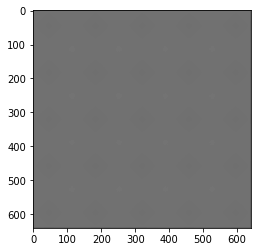

In [ ]:
def fiber_mask(N):
  array = np.zeros((N,N))
  esarray = np.zeros((N,N))*np.exp(1j*0)
  h=-1
  for i in range(0,N):
    k=0
    h=h+1
    if h==3:
      h=0
    for j in range(0,N):
      if k>0 and k<=2 and h>0 and h<=2:
        array[i,j]=1
        esarray[i,j]=np.exp(1j*2*np.pi*((i**2) +(j**2))/(50*wl))
      k=k+1  
      if k==3:
        k=0

  return array, esarray

p,esph=fiber_mask(N)

plt.figure()
plt.imshow(p,cmap='gray')
#mask_arr1 = ma.masked_array(in_arr1, mask = [[ 1, 0], [ 0, 1], [ 0, 0]]) 
plt.show()

In [ ]:
def propagar(ut,z):
  hh= np.zeros((N,N))*np.exp(-1j*0)
  if (z>=(N*(dx)**2)/wl):
      print("z está en el dominio de aplicación de DD de FF")
      for t in range(int(-N/2),int(N/2)):
                  for s in range(int(-N/2),int(N/2)):
          
                      h= np.exp(1j*k*((dx*t)**2 + (dx*s)**2)/(2*z))
                      hh[t,s]=h 
                              
      hh=np.fft.fftshift(hh)
      ut=np.fft.fftshift(ut)
      Ut = ut*hh
                  
      U1=np.fft.fft2(Ut)
      Uf=np.fft.fftshift(U1)
      UU=abs(Uf*Uf)
      
      
      plt.figure(figsize=(7,4))
      plt.imshow(np.angle(hh),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
      plt.ylabel('mm')
      plt.xlabel('mm')
      plt.show()



      plt.figure(figsize=(7,4))
      plt.imshow(abs(ut),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
      plt.ylabel('mm')
      plt.xlabel('mm')
      plt.show()


      plt.figure(figsize=(7,4))

      plt.imshow(UU,cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
      plt.ylabel('mm')
      plt.xlabel('mm')
      #plt.grid(True)
      plt.show()
                  
  else:
      print("z está en el domino de aplicación de ID de EA")
      for t in range(int(-N/2),int(N/2)):
                  for s in range(int(-N/2),int(N/2)):
          
                      h= np.exp(1j*k*z*np.sqrt(1-(wl**2)*((t/(N*dx))**2 + (s/(N*dx))**2)))
                      hh[t,s]=h

      h1=(hh)
      h1=np.fft.fftshift(h1)
      gt=(np.fft.fft2(ut))

                              
      Ut = gt*h1
      
      
      U1=np.fft.ifft2(Ut)
      Uf=np.fft.fftshift(U1)
      UU=abs(U1*U1)
      #UU=U*U
      #I = Image.fromarray(abs(U), 'P')
      plt.figure(figsize=(7,4))
      im1 = plt.imshow(np.angle(h1),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
      plt.ylabel('mm')
      plt.xlabel('mm')
      plt.colorbar(im1,shrink=0.5)
      plt.show()


      plt.figure(figsize=(7,4))
      im3 = plt.imshow(abs(ut),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
      plt.ylabel('mm')
      plt.xlabel('mm')
      plt.colorbar(im1,shrink=0.5)
      plt.show()


      #zoom=4
      plt.figure(figsize=(7,4))
      #plt.xlim(-1/zoom,1/zoom)
      #plt.ylim(-1/zoom,1/zoom)
      im2 = plt.imshow(UU,cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
      plt.ylabel('mm')
      plt.xlabel('mm')
      #plt.grid(False)
      plt.show()
  return U1

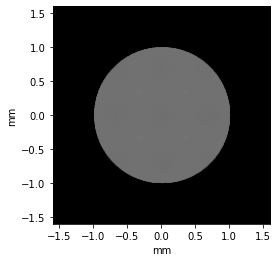

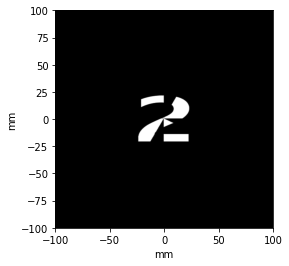

In [ ]:
ima= cv2.imread('2.jpg',cv2.IMREAD_GRAYSCALE)


ima=np.asarray(ima)
thresh = 128


# assign blue channel to zeros
#fb = cv2.threshold(fb, thresh, 255, cv2.THRESH_BINARY)[1]

scale_percent = 50
 
#calcular el 50 por ciento de las dimensiones originales
width = int(N)
height = int(N)
 
# dsize
dsize = (width, height)
 
# cambiar el tamaño de la image
ima=cv2.resize(ima, dsize)

f_b=p*ut

im=f_b*ima
plt.figure(figsize=(7,4))
im3 = plt.imshow((f_b),cmap='gray',extent=(-Lf/2,Lf/2,-Lf/2,Lf/2))
plt.ylabel('mm')
plt.xlabel('mm')
#plt.xlim([-5, 5])
#plt.ylim([-5, 5])
#plt.colorbar(im1,shrink=0.5)
plt.show()

plt.figure(figsize=(7,4))
im2 = plt.imshow((ima),cmap='gray',extent=(-L/2,L/2,-L/2,L/2))
plt.ylabel('mm')
plt.xlabel('mm')
#plt.colorbar(im1,shrink=0.5)
plt.show()


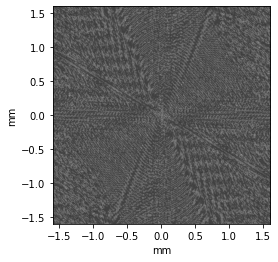

In [ ]:
U=np.fft.fft2(ima)
U=np.fft.fftshift(U)
U1=abs(np.angle(U)**2)*np.exp(1j*0)

plt.figure(figsize=(7,4))
im3 = plt.imshow(abs(U1),cmap='gray',extent=(-Lf/2,Lf/2,-Lf/2,Lf/2))
plt.ylabel('mm')
plt.xlabel('mm')
#plt.colorbar(im1,shrink=0.5)
plt.show()

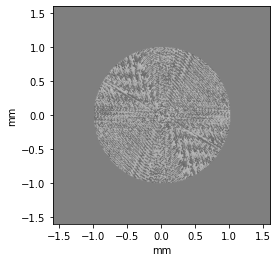

In [ ]:
#U=np.fft.fftshift(U)

#U1=abs(U**2)
Ut=f_b*U
Ut=Ut#*esph

plt.figure(figsize=(7,4))
im3 = plt.imshow(np.angle(Ut)*ut,cmap='gray',extent=(-Lf/2,Lf/2,-Lf/2,Lf/2))
plt.ylabel('mm')
plt.xlabel('mm')
#plt.colorbar(im1,shrink=0.5)
plt.show()

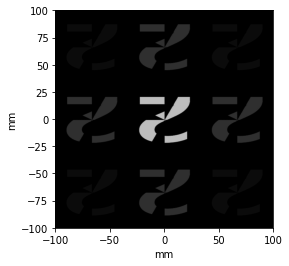

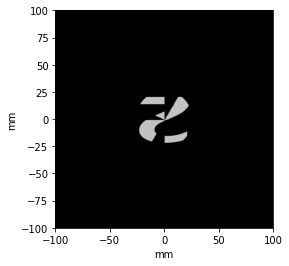

In [ ]:
f=np.fft.fft2(Ut)
#f=np.fft.fftshift(f)
ff=np.fft.fft2(f)
plt.figure(figsize=(7,4))
im3 = plt.imshow(abs(f*f),cmap='gray',extent=(-N/(2*Lf),N/(2*Lf),-N/(2*Lf),N/(2*Lf)))
plt.ylabel('mm')
plt.xlabel('mm')
#plt.colorbar(im1,shrink=0.5)
plt.show()

im3 = plt.imshow(abs(f*f)*utt,cmap='gray',extent=(-N/(2*Lf),N/(2*Lf),-N/(2*Lf),N/(2*Lf)))
plt.ylabel('mm')
plt.xlabel('mm')
#plt.colorbar(im1,shrink=0.5)
plt.show()